<a href="https://www.kaggle.com/code/prjwal07/cats-vs-dogs?scriptVersionId=218970974" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-catsvsdogs-dataset/readme[1].txt
/kaggle/input/microsoft-catsvsdogs-dataset/MSR-LA - 3467.docx
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7981.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6234.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1269.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3863.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6241.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10304.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/623.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2193.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11925.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3750.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11378.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2008.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10730.jpg
/kaggle/input/micros

In [2]:
!pip show tensorflow

Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras


In [16]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [2]:
import os
from matplotlib import pyplot as plt

In [3]:
os.path.join('data','dogs','cats')
print(os.getcwd())

/kaggle/working


In [4]:
import cv2
import imghdr

In [5]:
data_dir = '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages'


In [6]:
#checking our dataset
dogs = os.path.join(data_dir,'Dog')
cats = os.path.join(data_dir,'Cat')
print(os.listdir(dogs))
print(os.listdir(cats))

['7981.jpg', '6234.jpg', '1269.jpg', '3863.jpg', '6241.jpg', '10304.jpg', '623.jpg', '2193.jpg', '11925.jpg', '3750.jpg', '11378.jpg', '2008.jpg', '10730.jpg', '5982.jpg', '7737.jpg', '2081.jpg', '10597.jpg', '6588.jpg', '10054.jpg', '7966.jpg', '3919.jpg', '6197.jpg', '10924.jpg', '6399.jpg', '9960.jpg', '3757.jpg', '9131.jpg', '9620.jpg', '9062.jpg', '4489.jpg', '3138.jpg', '10213.jpg', '3417.jpg', '6074.jpg', '5705.jpg', '8953.jpg', '764.jpg', '5307.jpg', '7894.jpg', '5039.jpg', '10305.jpg', '4407.jpg', '1700.jpg', '1786.jpg', '2907.jpg', '8930.jpg', '11138.jpg', '6324.jpg', '1075.jpg', '4969.jpg', '8983.jpg', '5584.jpg', '10627.jpg', '9697.jpg', '3501.jpg', '10037.jpg', '2863.jpg', '771.jpg', '8352.jpg', '208.jpg', '12167.jpg', '11868.jpg', '4640.jpg', '7222.jpg', '5333.jpg', '4125.jpg', '6560.jpg', '2628.jpg', '10162.jpg', '8104.jpg', '3363.jpg', '4009.jpg', '9645.jpg', '9579.jpg', '820.jpg', '6943.jpg', '3228.jpg', '12132.jpg', '8075.jpg', '6272.jpg', '1789.jpg', '6365.jpg', '645

In [7]:
os.listdir(data_dir)

['Dog', 'Cat']

In [8]:
images_exts = ['jpeg','jpg','png','bmp']
print("Images which are allowed : ",images_exts)

Images which are allowed :  ['jpeg', 'jpg', 'png', 'bmp']


In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image is not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Issue with image /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7981.jpg
Issue with image /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6234.jpg
Issue with image /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1269.jpg
Issue with image /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3863.jpg
Issue with image /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6241.jpg
Issue with image /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10304.jpg
Issue with image /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/623.jpg
Issue with image /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2193.jpg
Issue with image /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11925.jpg
Issue with image /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3750.jpg
Issue with image /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11378.jpg
Issue with image /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2008.jpg
Is

In [10]:
img = cv2.imread(os.path.join('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages','Dog','/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10.jpg'))

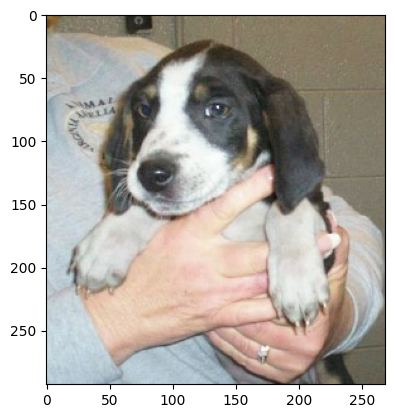

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
#building data pipeline
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages')

Found 25000 files belonging to 2 classes.


In [18]:
data_iterator = data.as_numpy_iterator()


In [19]:
#this is grabbing one batch , run it again to get batch
batch = next(data_iterator)
print("Batch:", batch)
print("Type:", type(batch))
if isinstance(batch, tuple):
    print("Tuple length:", len(batch))
    for idx, element in enumerate(batch):
        print(f"Element {idx} shape:", element.shape)

Batch: (array([[[[1.19070312e+02, 1.08976562e+02, 1.04523438e+02],
         [1.18546875e+02, 1.08453125e+02, 1.04000000e+02],
         [1.17546875e+02, 1.07453125e+02, 1.03000000e+02],
         ...,
         [2.00617188e+02, 1.90382812e+02, 1.62000000e+02],
         [2.02023438e+02, 1.86882812e+02, 1.60453125e+02],
         [2.02453125e+02, 1.86453125e+02, 1.60453125e+02]],

        [[1.14445312e+02, 1.11242188e+02, 1.04523438e+02],
         [1.13921875e+02, 1.10718750e+02, 1.04000000e+02],
         [1.12921875e+02, 1.09718750e+02, 1.03000000e+02],
         ...,
         [2.00617188e+02, 1.90382812e+02, 1.62000000e+02],
         [2.02570312e+02, 1.87429688e+02, 1.61000000e+02],
         [2.03000000e+02, 1.87000000e+02, 1.61000000e+02]],

        [[1.11396851e+02, 1.12650024e+02, 1.04523438e+02],
         [1.10885864e+02, 1.12114136e+02, 1.04000000e+02],
         [1.09898315e+02, 1.11101685e+02, 1.03000000e+02],
         ...,
         [2.00617188e+02, 1.90382812e+02, 1.62000000e+02],
  

In [20]:
batch[0].shape

(32, 256, 256, 3)

In [21]:
#class 1 = dog
#class 0 = cat
batch[0]

array([[[[1.19070312e+02, 1.08976562e+02, 1.04523438e+02],
         [1.18546875e+02, 1.08453125e+02, 1.04000000e+02],
         [1.17546875e+02, 1.07453125e+02, 1.03000000e+02],
         ...,
         [2.00617188e+02, 1.90382812e+02, 1.62000000e+02],
         [2.02023438e+02, 1.86882812e+02, 1.60453125e+02],
         [2.02453125e+02, 1.86453125e+02, 1.60453125e+02]],

        [[1.14445312e+02, 1.11242188e+02, 1.04523438e+02],
         [1.13921875e+02, 1.10718750e+02, 1.04000000e+02],
         [1.12921875e+02, 1.09718750e+02, 1.03000000e+02],
         ...,
         [2.00617188e+02, 1.90382812e+02, 1.62000000e+02],
         [2.02570312e+02, 1.87429688e+02, 1.61000000e+02],
         [2.03000000e+02, 1.87000000e+02, 1.61000000e+02]],

        [[1.11396851e+02, 1.12650024e+02, 1.04523438e+02],
         [1.10885864e+02, 1.12114136e+02, 1.04000000e+02],
         [1.09898315e+02, 1.11101685e+02, 1.03000000e+02],
         ...,
         [2.00617188e+02, 1.90382812e+02, 1.62000000e+02],
         [

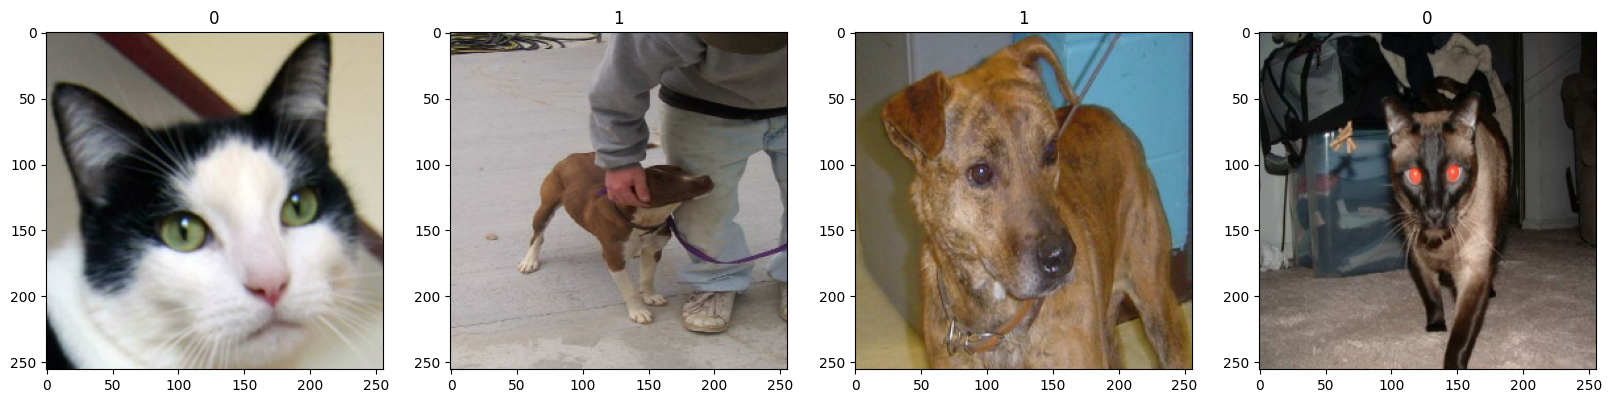

In [22]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
scaled = batch[0]/255
scaled.max()

1.0

In [24]:
data = data.map(lambda x,y : (x/255,y))

In [25]:
iterator= data.as_numpy_iterator()
try :
    batch= next(iterator)
    print(batch)
except Exception as e:
    print(f"Error: {e}")
    

(array([[[[0.83474183, 0.8229771 , 0.75631046],
         [0.84420633, 0.8324416 , 0.76577497],
         [0.8502302 , 0.8384655 , 0.77179885],
         ...,
         [0.9205052 , 0.9008974 , 0.8263876 ],
         [0.9142572 , 0.8946494 , 0.8201396 ],
         [0.9008204 , 0.88121253, 0.80670273]],

        [[0.8368626 , 0.8250979 , 0.75843126],
         [0.84692705, 0.83516234, 0.7684957 ],
         [0.8470358 , 0.8352711 , 0.76860446],
         ...,
         [0.89184976, 0.87017393, 0.80186814],
         [0.89554304, 0.8738672 , 0.8055614 ],
         [0.886818  , 0.8651421 , 0.7968363 ]],

        [[0.84196097, 0.83019626, 0.7635296 ],
         [0.84827596, 0.83651125, 0.7698446 ],
         [0.83673614, 0.82497144, 0.7583048 ],
         ...,
         [0.8897699 , 0.8662405 , 0.8103888 ],
         [0.897466  , 0.8739366 , 0.8180849 ],
         [0.8823759 , 0.8588465 , 0.8029948 ]],

        ...,

        [[0.7390133 , 0.7355666 , 0.65178907],
         [0.7503121 , 0.74686545, 0.66308784

In [26]:
scaled_iterator = data.as_numpy_iterator()

In [27]:
batch = scaled_iterator.next()

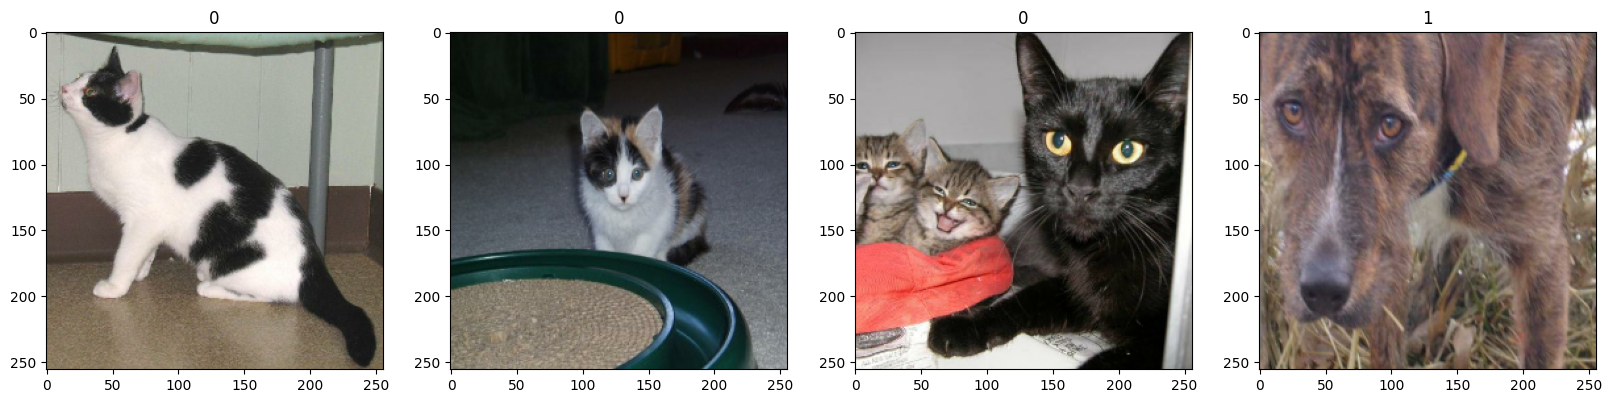

In [28]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [29]:
len(data)

782

In [30]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2) + 1
test_size = len(data) - (train_size + val_size)  # Adjust the last one


In [31]:
train_size + val_size + test_size

782

In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size) .take(test_size)

In [34]:
len(test)

78

In [ ]:
import tensorflow as tf
import os

# Define the path to your dataset
train_data_path = '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages'

# Verify the dataset path
print("Files in dataset folder:", os.listdir(train_data_path))

# Load dataset
train_dataset = tf.data.Dataset.list_files(train_data_path + '/*/*', shuffle=True)

# Function to load and preprocess images
def load_and_preprocess_image(file_path):
    try:
        # Load the raw image
        raw_image = tf.io.read_file(file_path)
        # Decode the image
        image = tf.image.decode_jpeg(raw_image, channels=3)
        # Resize the image
        image = tf.image.resize(image, [224, 224])
        # Normalize pixel values
        image = image / 255.0
        # Extract the label (based on folder name)
        label = tf.strings.split(file_path, os.sep)[-2] == 'Dog'
        label = tf.cast(label, tf.int32)
        return image, label
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None, None

# Map the preprocessing function
train_dataset = train_dataset.map(load_and_preprocess_image)

# Filter out None entries
train_dataset = train_dataset.filter(lambda image, label: image is not None and label is not None)

# Batch and prefetch for performance
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Train your model
model.fit(train_dataset, epochs=10)


In [ ]:
import tensorflow as tf

def load_and_preprocess_image(file_path, label):
    try:
        # Read the image file
        image = tf.io.read_file(file_path)
        # Decode the image as a JPEG file, this will raise an error if the file is corrupted
        image = tf.image.decode_jpeg(image, channels=3)
        # Resize the image to the desired size
        image = tf.image.resize(image, [256, 256])
        # Normalize the image to [0,1] range
        image = image / 255.0
        return image, label
    except tf.errors.InvalidArgumentError:
        # If there's an error decoding the image, return None
        return None, None


In [ ]:
# Assuming 'train_dataset' is your original dataset
train_dataset = train_dataset.map(load_and_preprocess_image)

# Filter out entries where the image or label is None
train_dataset = train_dataset.filter(lambda image, label: image is not None and label is not None)


#Building deep learning model


In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Dense , Flatten , Dropout

In [69]:
#initializing the model
model = Sequential()

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Convolutional layers
model.add(Conv2D(16, (3, 3), strides=(1, 1), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D())

# Flatten for Dense layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [110]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics = ['accuracy'])


In [111]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:
logdir = 'logs'

In [100]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [104]:
for x, y in train.take(1):  # Take one batch
    print(x.shape)  # Shape of input data
    print(y.shape)  # Shape of labels


(32, 256, 256, 3)
(32,)


In [105]:
print(train.element_spec)
print(val.element_spec)


(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [112]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

# Updated model with convolutional layers
model = Sequential([
    # Add convolutional layers to process 2D image input
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),  # Flatten the 2D features to a 1D vector
    Dense(128, activation='relu'),  # Fully connected layer
    Dense(10, activation='softmax')  # Adjust output size based on the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/10
 29/547 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.4096 - loss: 25.0235

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) INVALID_ARGUMENT:  Input size should match (header_size + row_size * abs_height) but they differ by 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) INVALID_ARGUMENT:  Input size should match (header_size + row_size * abs_height) but they differ by 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_one_step_on_iterator_10969]

In [106]:
model.compile(
    optimizer='adam',  # Or any optimizer of your choice
    loss='categorical_crossentropy',  # Use appropriate loss function
    metrics=['accuracy']  # Include metrics you want to monitor
)

# Then you can train your model
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_10" is incompatible with the layer: expected axis -1 of input shape to have value 3072, but received input with shape (None, 196608)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 256, 256, 3), dtype=float32)
  • training=True
  • mask=None

In [107]:
hist = model.fit(train,epochs = 10 ,validation_data = val ,callbacks = [tensorboard_callback])

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_10" is incompatible with the layer: expected axis -1 of input shape to have value 3072, but received input with shape (None, 196608)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 256, 256, 3), dtype=float32)
  • training=True
  • mask=None